<a href="https://colab.research.google.com/github/AirPro/Mod4HandsOnFreidrd/blob/main/Mod4HandsOnFreidrd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Hands On Traffic Sign Assignment
By: Robert Freid for the Deep Learning Mod 4 Assignment
## Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Mounting Google Drive Notes
Drive already mounted at /content/drive; <br>
To attempt to forcibly remount call: <br>
drive.mount('/content/drive',force_remout=True)
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image # to read image data
import os
from sklearn.model_selection import train_test_split # to split training and testing data
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout 

## Read the images and save them and their corresponding labels in lists

In [2]:
data = []
labels = []
classes = 43

# Copied Path: /content/drive/MyDrive/TrafficSignsData/myData

cur_path = "/content/drive/MyDrive/TrafficSignsData/myData"

# Retreiving the images and their labels

for i in range(classes):
  path = os.path.join(cur_path,str(i))
  images = os.listdir(path)
  print('Opened Class: ', i)
  for a in images:
    try:
      image = Image.open(path + '/' + a)
      image = image.resize((32, 32))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except:
      print('Error Loading Image')

Opened Class:  0
Opened Class:  1
Opened Class:  2
Opened Class:  3
Opened Class:  4
Opened Class:  5
Opened Class:  6
Opened Class:  7
Opened Class:  8
Opened Class:  9
Opened Class:  10
Opened Class:  11
Opened Class:  12
Opened Class:  13
Opened Class:  14
Opened Class:  15
Opened Class:  16
Opened Class:  17
Opened Class:  18
Opened Class:  19
Opened Class:  20
Opened Class:  21
Opened Class:  22
Opened Class:  23
Opened Class:  24
Opened Class:  25
Opened Class:  26
Opened Class:  27
Opened Class:  28
Opened Class:  29
Opened Class:  30
Opened Class:  31
Opened Class:  32
Opened Class:  33
Opened Class:  34
Opened Class:  35
Opened Class:  36
Opened Class:  37
Opened Class:  38
Opened Class:  39
Opened Class:  40
Opened Class:  41
Opened Class:  42


## Save the data and labels as numpy arrays
## Divide training and testing sets

In [68]:
data = np.array(data)
labels = np.array(labels)
print('Data.shape')
print(data.shape)
print('Labels.shape')
print(labels.shape)

# Splitting training and testing data

X_train, X_test, y_train, y_test= train_test_split(data, labels, test_size=0.2, random_state=42)
print('train_test_split results')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Data.shape
(73139, 32, 32, 3)
Labels.shape
(73139,)
train_test_split results
(58511, 32, 32, 3) (14628, 32, 32, 3) (58511,) (14628,)


## One hot encodng for labels

In [69]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Define the Deep Learning Model 

In [70]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Show the Model Summary

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 14, 14, 16)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        9280      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 6, 6, 64)         

## Plot the Model Diagram

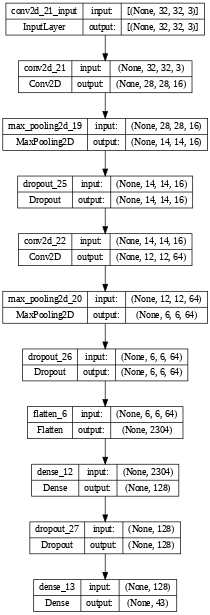

In [72]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', dpi=50,show_shapes=True, show_layer_names=True)

## Compile the Model

In [73]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Set Batch size and number of Epochs

In [74]:
epochsNum = 20
batchSize = 100

## Train the model

In [75]:
history=model.fit(X_train, y_train, epochs=epochsNum, batch_size=batchSize, validation_split=0.1, shuffle=True)

Epoch 1/20
527/527 [==============================] - 63s 117ms/step - loss: 4.3271 - accuracy: 0.0650 - val_loss: 3.5814 - val_accuracy: 0.0695
Epoch 2/20
527/527 [==============================] - 62s 117ms/step - loss: 3.5478 - accuracy: 0.0670 - val_loss: 3.5122 - val_accuracy: 0.0695
Epoch 3/20
527/527 [==============================] - 63s 120ms/step - loss: 3.5078 - accuracy: 0.0668 - val_loss: 3.4887 - val_accuracy: 0.0695
Epoch 4/20
527/527 [==============================] - 61s 116ms/step - loss: 3.4937 - accuracy: 0.0678 - val_loss: 3.4802 - val_accuracy: 0.0699
Epoch 5/20
527/527 [==============================] - 61s 116ms/step - loss: 3.4545 - accuracy: 0.0783 - val_loss: 3.3261 - val_accuracy: 0.1114
Epoch 6/20
527/527 [==============================] - 61s 116ms/step - loss: 3.3444 - accuracy: 0.1095 - val_loss: 2.9751 - val_accuracy: 0.2174
Epoch 7/20
527/527 [==============================] - 62s 118ms/step - loss: 2.9576 - accuracy: 0.2184 - val_loss: 2.1383 - val_ac

## Train versus Validation Training Loss

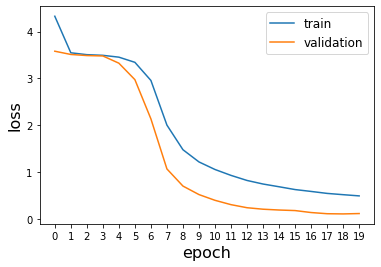

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right', fontsize='large')
plt.ylabel('loss', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.yticks()
plt.xticks(np.arange(0, epochsNum))
plt.show()

## Train versus Validation Accuracy

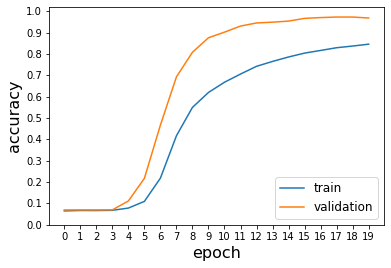

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.yticks(np.arange(0.0, 1.05, 0.1))#, step=0.5))
plt.xticks(np.arange(0, epochsNum))# +1 )) step=10))
plt.legend(['train', 'validation'], loc='lower right', fontsize='large')
plt.show()

## Test the Model

In [78]:
pred_test = model.predict(X_test)
y_pred = pred_test.round()
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

458/458 [==============================] - 7s 15ms/step
Accuracy on test data: 0.9675280451774597% 
 Error on test data: 0.03247195482254028


## Decode the One Hot Encoder back to Labels

In [79]:
decoded_y_test = tf.argmax(y_test, axis=1)
decoded_prediction = tf.argmax(pred_test, axis=1)

print(decoded_y_test.shape)
print(decoded_prediction.shape)

(14628,)
(14628,)


## Confusion Matrix

In [80]:
tf.math.confusion_matrix(decoded_y_test, decoded_prediction)

<tf.Tensor: shape=(43, 43), dtype=int32, numpy=
array([[ 67,  15,   0, ...,   0,   0,   0],
       [  0, 959,  13, ...,   0,   0,   0],
       [  0,   6, 472, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ..., 134,   0,   0],
       [  0,   0,   0, ...,   0,  88,   2],
       [  0,   0,   0, ...,   0,   0,  72]], dtype=int32)>

## Confusion Matrix using Seaborn

Text(0.5, 1.0, 'Confusion Matrix')

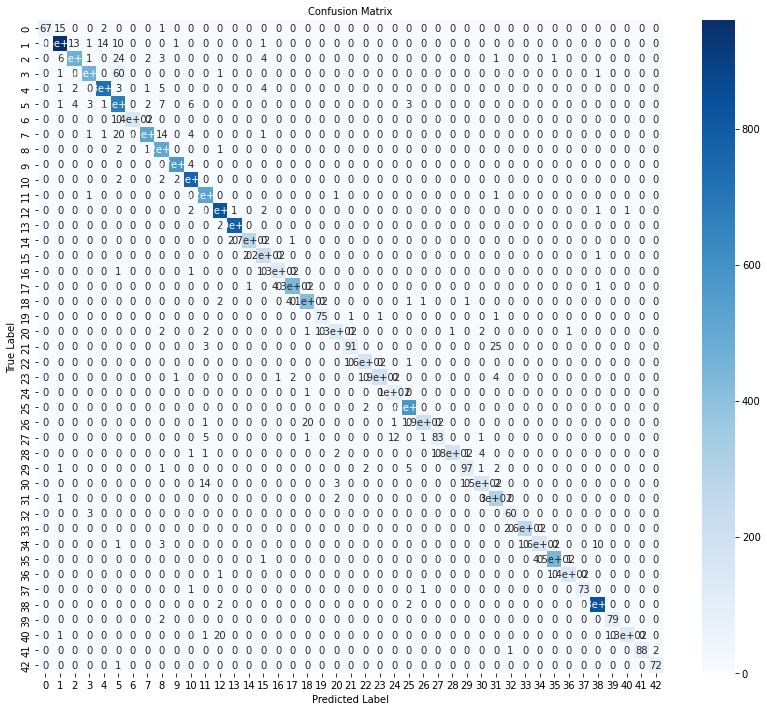

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(decoded_y_test, decoded_prediction)
plt.figure(figsize=(14,12))
sn.heatmap(cm,annot=True, cmap='Blues') # fmt='d', xticklabels=labels[name],yticklabels=labels['name], cbar=False
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix", fontsize=10)